# Visualisation

## Exploratory Data Analysis and Pre-processing

In this module you will learn how to load an online retail dataset in Python and visualise it. 

You will learn how to plot data which will help you in the future when building models.

For this module, you will need to import 

* `pandas` (as `pd`) [link to documentation](https://pandas.pydata.org/pandas-docs/stable/)
* `matplotlib.pyplot` (as `plt`) [link to documentation](https://matplotlib.org/contents.html)
* `seaborn` (as `sns`) [link to documentation](https://seaborn.pydata.org)


In order to use `matplotlib` in the notebook, you need to have a cell with
```python
%matplotlib inline
```

In [1]:
# add your code here to load the libraries
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


### Loading the dataset


Load the dataset `online_retail_customer_data.csv` with `pandas`. Recall that you need to 

* use the `read_csv()` method from `pandas`
* point to the location of the dataset
* determine a name under which you want to store the resulting data frame (we suggest the name `customers`)
* specify that the `CustomerID` column is the index column using the `index_col` option

Use the `head` method to display the first few lines of the dataset (you can specify how many lines).

In [2]:
customers = pd.read_csv('data/online_retail_customer_data.csv',
                        index_col='CustomerID')

customers.head()


,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
CustomerID,,,,,,,,,,
12346,0.00,77183.6,38591.800000,0.0,2.0,365.000000,74215.0,-74215.0,-77183.60,77183.60
12348,3874.60,2248.8,1291.533333,478.8,3.0,54.500000,6876.0,0.0,0.00,3874.60
12350,294.40,294.4,294.400000,294.4,1.0,365.000000,196.0,0.0,0.00,294.40
12352,1845.13,1054.1,393.092000,0.0,5.0,11.333333,774.0,-63.0,-120.33,1965.46
12354,1079.40,1079.4,1079.400000,1079.4,1.0,365.000000,530.0,0.0,0.00,1079.40



### About the dataset

The dataset is based on data from an online retailer selling gifts and is based on a dataset taken from [here](https://archive.ics.uci.edu/ml/datasets/Online+Retail#).

We have taken the original data and done some preprocessing (filled in missing elements, removed non-numerical columns) to create a 'profile' for each customer, which includes a number of features such as:

* `balance`: Amount of money spent at the store (purchases minus refunds).
* `n_orders`: Total number of orders from the online retailer.
* `time_between_orders`: Average time (in days) between orders.
* `max_spent`: Most amount of money customer spent on a single order.

### Scaling

The different numerical variables may have completely different scales. This can be easily checked with a boxplot. You'll use the `seaborn` wrapper around `matplotlib` that is great for producing clear plots.
Have a look [here](https://stanford.edu/~mwaskom/software/seaborn/examples/index.html) for a gallery of plots possible with `seaborn`.

* define a figure environment with the `figure()` method of `matplotlib.pyplot` (you can pass a figure size)
* use the `boxplot` function of `seaborn` specifying the appropriate dataframe

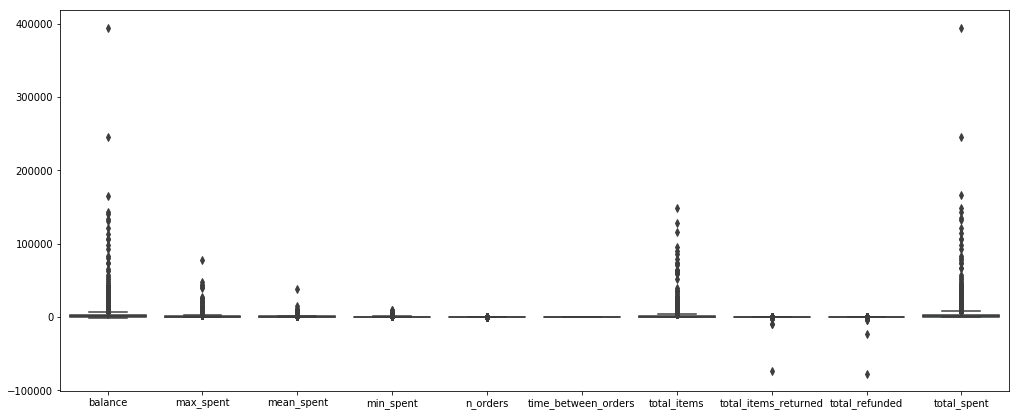

In [3]:
# add your code to plot a sns.boxplot() of the customer dataframe
plt.figure(figsize=(17,7))

sns.boxplot(data=customers)


As we can see, the variables have completely different scales. This can normally be resolved by scaling, but that is beyond the objectives of this module so we will skip it. The current state of the data will do just fine for all of our plotting exercises.

## Relationship between input features

An important tool for the exploratory data analysis step is the **scatter plot**. 

This plot helps visualise the relationship in-between two input features. It may also give you a first indication of the model to applied. 

Create a scatter plot of the `n_orders` vs `balance` using the `lmplot` function of `seaborn`. Once you have a grip of this, you should try looking at the scatter plot corresponding to other couples.

E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


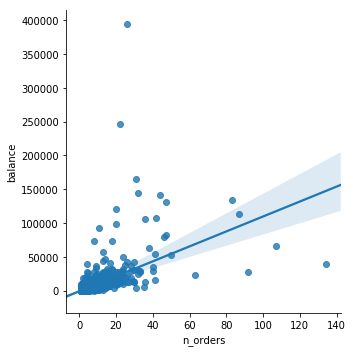

In [4]:
sns.lmplot('n_orders', 'balance', customers)

### Grid/scatterplot matrix

A scatterplot matrix shows a grid of all scatterplots where each attribute is plotted against all other attributes.
This can be applied when there aren't too many variables (otherwise it quickly becomes impractical). 

You can find further information on how to create a scatterplot matrix with seaborn using the `pairplot()` function [here](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html).


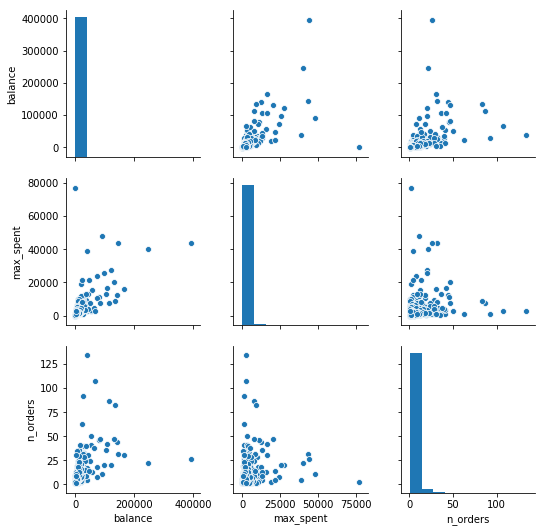

In [6]:
sns.pairplot(customers.loc[:,["balance", "max_spent", "n_orders"]])


### Correlation matrix and heatmap of correlations between the input features

It is often of great interest to investigate whether any of the variables in a multivariate dataset are significantly correlated. 
As previously shown, the different features (variables) in `customers` are not independent from each other. 
To quickly identify which features are related and to what degree, it is useful to compute a correlation matrix that shows the correlation coefficient for each pair of variables. 
You can do this by using the `corr()` function from the `pandas` library:

In [7]:
customers.corr()


,balance,max_spent,mean_spent,min_spent,n_orders,time_between_orders,total_items,total_items_returned,total_refunded,total_spent
balance,1.000000,0.691267,0.457883,-0.015926,0.569494,-0.246144,0.851517,-0.026760,-0.041862,0.993473
max_spent,0.691267,1.000000,0.855598,0.123699,0.303588,-0.205007,0.679515,-0.516829,-0.527861,0.743715
mean_spent,0.457883,0.855598,1.000000,0.458817,0.120991,-0.120127,0.489252,-0.621863,-0.630209,0.524654
min_spent,-0.015926,0.123699,0.458817,1.000000,-0.187085,0.193696,-0.014493,0.017665,0.023856,-0.018470
n_orders,0.569494,0.303588,0.120991,-0.187085,1.000000,-0.442301,0.596804,-0.017432,-0.035714,0.567133
time_between_orders,-0.246144,-0.205007,-0.120127,0.193696,-0.442301,1.000000,-0.251269,-0.008421,0.000399,-0.243406
total_items,0.851517,0.679515,0.489252,-0.014493,0.596804,-0.251269,1.000000,-0.213729,-0.224313,0.867498
total_items_returned,-0.026760,-0.516829,-0.621863,0.017665,-0.017432,-0.008421,-0.213729,1.000000,0.977110,-0.138010
total_refunded,-0.041862,-0.527861,-0.630209,0.023856,-0.035714,0.000399,-0.224313,0.977110,1.000000,-0.155555
total_spent,0.993473,0.743715,0.524654,-0.018470,0.567133,-0.243406,0.867498,-0.138010,-0.155555,1.000000


To visualise the degree of correlation between variables, you can use a heatmap (also from `seaborn`, use the `heatmap` method and pass it the correlation matrix calculated in the previous exercise, also set center option to 0). 

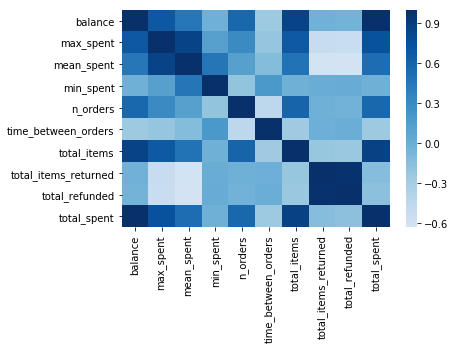

In [14]:
sns.heatmap(customers.corr(),cmap = "Blues", center=0)
